BV

# Activity 1
Hint: use the file nutrition_demographic_covid_continent_2.csv

1. check if there are highly correlated features and drop them if there are any.
2. One Hot/Label Encoding of the categorical variables in the categoricals data frame that you created in Activity 4. ( Hint: check Dropfirst option).
3. for the first iteration, we will focus on the numericals data (numericals data frame) as our data source.
    1. X-y split (y is the target variable which is the total claim amount)
    2. (optional) remove the outliers from the numerical columns.

We have the Total Complain amount
Why we need a model to predict the Total Complain amount? = we need the historic data to predict the total claim amount for the news customers but with new characteristiques.

In [36]:
%matplotlib inline
import numpy as np
import pandas as pd
from IPython.display import Image
from IPython.display import HTML
from IPython.display import Markdown, display
def printmd(string):display(Markdown(string))
import seaborn as sns
import statsmodels.api as sm
from scipy.stats import boxcox
pd.options.display.max_rows = 100
import matplotlib.pyplot as plt
from scipy.stats import norm
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import quantile_transform
from sklearn.preprocessing import minmax_scale
from sklearn.preprocessing import OneHotEncoder  ##. better to use dummy from pandas 
from sklearn.preprocessing import PowerTransformer
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import mean_absolute_error as mae

In [37]:
def load_original_data():
    filename = r"Data\\5. Updated with continent codes\nutrition_demographic_covid_continent_2.csv"
    file1 = pd.read_csv(filename, index_col=False)
    #hk_df = pd.read_csv(filename, index_col=False)
    return file1

## Pipeline Controller

In [38]:
hk_df =load_original_data()

## Reading the dataframe

In [39]:
hk_df = load_original_data()

### check if there are highly correlated features and drop them if there are any

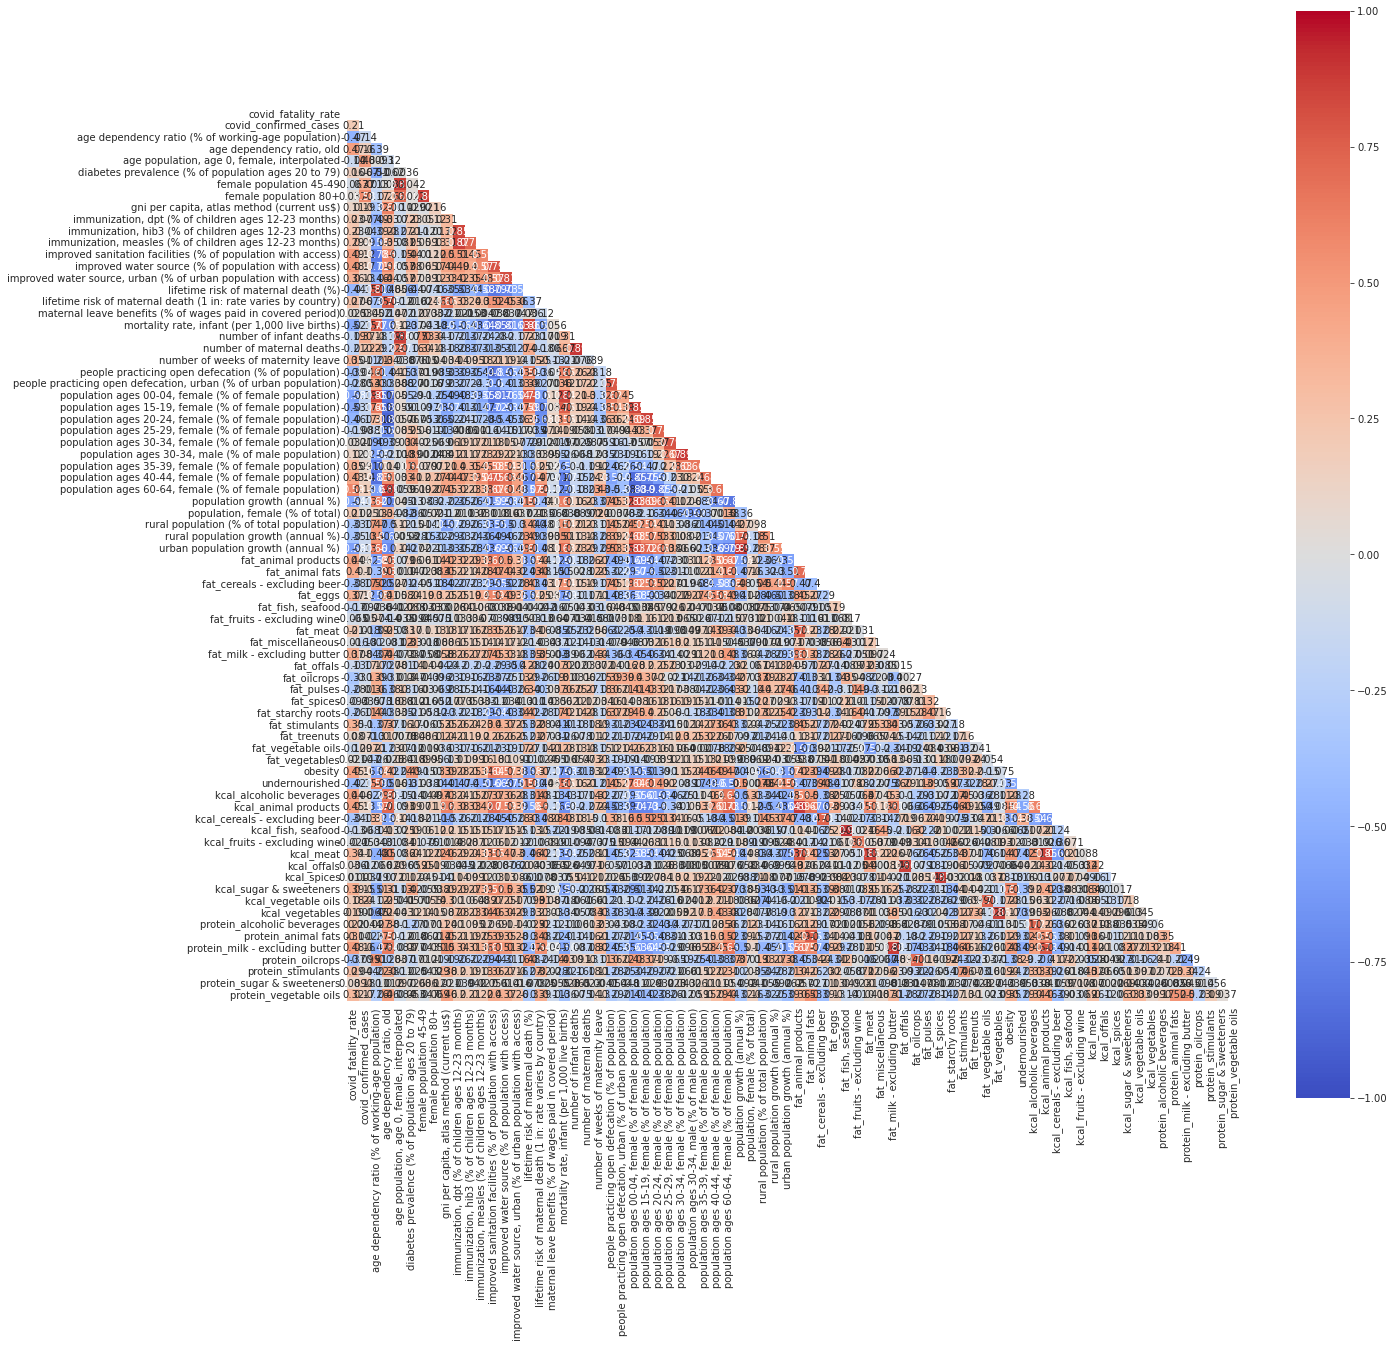

In [41]:
corr = hk_df.corr()
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
with sns.axes_style("white"):
    f, ax = plt.subplots(figsize=(20, 20))
    ax = sns.heatmap(corr, mask=mask,cmap='coolwarm', vmin=-1,vmax=1,annot=True, square=True)

### One Hot/Label Encoding of the categorical variables in the categoricals data frame that you created in Activity 4. ( Hint: check Dropfirst option).

In [6]:
df_cat= hk_df.select_dtypes("object")

cat_val=pd.get_dummies(df_cat, drop_first=True)
cat_val

,continent_asia,continent_europe,continent_north america,continent_oceania,continent_south america,country_albania,country_algeria,country_angola,country_antigua and barbuda,country_argentina,...,country_uruguay,country_uzbekistan,country_vanuatu,country_venezuela,country_vietnam,country_yemen,country_zambia,country_zimbabwe,gni_category_low_gni,gni_category_mid_gni
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,0,1,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1
4,0,0,1,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
157,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
158,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,1,0
159,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,1,0
160,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## Select numerical data

Get the numeric data into dataframe called `numerical` 
(You can use np.number and np.object to select the numerical data types and categorical data types respectively)

array([[<AxesSubplot:title={'center':'covid_fatality_rate'}>,
        <AxesSubplot:title={'center':'covid_confirmed_cases'}>,
        <AxesSubplot:title={'center':'age dependency ratio (% of working-age population)'}>,
        <AxesSubplot:title={'center':'age dependency ratio, old'}>,
        <AxesSubplot:title={'center':'age population, age 0, female, interpolated'}>,
        <AxesSubplot:title={'center':'diabetes prevalence (% of population ages 20 to 79)'}>,
        <AxesSubplot:title={'center':'female population 45-49'}>,
        <AxesSubplot:title={'center':'female population 80+'}>,
        <AxesSubplot:title={'center':'gni per capita, atlas method (current us$)'}>],
       [<AxesSubplot:title={'center':'immunization, dpt (% of children ages 12-23 months)'}>,
        <AxesSubplot:title={'center':'immunization, hib3 (% of children ages 12-23 months)'}>,
        <AxesSubplot:title={'center':'immunization, measles (% of children ages 12-23 months)'}>,
        <AxesSubplot:title={'c

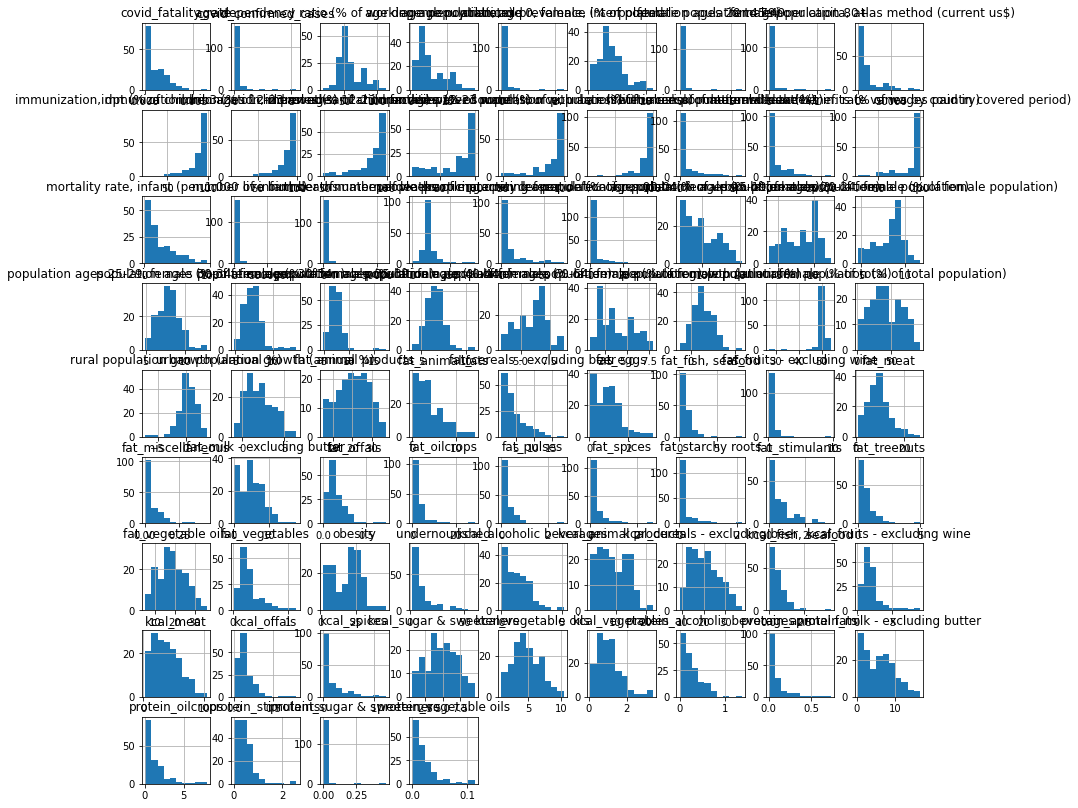

In [7]:
hk_df.hist(figsize=(14,14))

In [8]:
df_num = hk_df._get_numeric_data()
#df_num1 = df_num.drop(['number_of_open_complaints', 'number_of_policies' ], axis=1)
#df_num1


In [9]:
colnames_numerics_only = df_num.select_dtypes(include=np.number).columns.tolist()
colnames_numerics_only

['covid_fatality_rate',
 'covid_confirmed_cases',
 'age dependency ratio (% of working-age population)',
 'age dependency ratio, old',
 'age population, age 0, female, interpolated',
 'diabetes prevalence (% of population ages 20 to 79)',
 'female population 45-49',
 'female population 80+',
 'gni per capita, atlas method (current us$)',
 'immunization, dpt (% of children ages 12-23 months)',
 'immunization, hib3 (% of children ages 12-23 months)',
 'immunization, measles (% of children ages 12-23 months)',
 'improved sanitation facilities (% of population with access)',
 'improved water source (% of population with access)',
 'improved water source, urban (% of urban population with access)',
 'lifetime risk of maternal death (%)',
 'lifetime risk of maternal death (1 in: rate varies by country)',
 'maternal leave benefits (% of wages paid in covered period)',
 'mortality rate, infant (per 1,000 live births)',
 'number of infant deaths',
 'number of maternal deaths',
 'number of weeks

### Predictive Modeling

#### X-y split (y is the target variable which is the total claim amount)

In [10]:
X=df_num.drop(['covid_fatality_rate'], axis=1)
y=df_num.covid_fatality_rate

In [11]:
#X=X._get_numeric_data()
X

,covid_confirmed_cases,age dependency ratio (% of working-age population),"age dependency ratio, old","age population, age 0, female, interpolated",diabetes prevalence (% of population ages 20 to 79),female population 45-49,female population 80+,"gni per capita, atlas method (current us$)","immunization, dpt (% of children ages 12-23 months)","immunization, hib3 (% of children ages 12-23 months)",...,kcal_sugar & sweeteners,kcal_vegetable oils,kcal_vegetables,protein_alcoholic beverages,protein_animal fats,protein_milk - excluding butter,protein_oilcrops,protein_stimulants,protein_sugar & sweeteners,protein_vegetable oils
0,158084,86.954464,4.616073,470554.0,8.8,496113.0,43481.0,630.0000,78.000000,78.000000,...,2.2261,2.3012,0.7504,0.0000,0.0277,5.5278,0.2034,0.5546,0.0000,0.0000
1,210224,44.806973,17.950766,21438.0,10.3,97198.0,41381.0,4290.0000,98.000000,98.000000,...,3.4422,2.8244,2.7508,0.1840,0.0711,16.4750,0.3722,0.2635,0.0042,0.0084
2,218432,52.617579,9.062490,459353.0,7.5,1053861.0,253907.0,4870.0000,95.000000,95.000000,...,3.9869,5.7638,2.0457,0.0323,0.0054,8.0616,0.1830,0.4628,0.0000,0.0269
3,81593,99.855751,4.623604,502641.0,4.1,383280.0,38663.0,4180.0000,64.000000,64.000000,...,2.7539,4.2741,0.3525,0.6285,0.0277,1.1460,2.1534,0.1017,0.0092,0.0092
4,4283,45.650381,10.434645,734.0,13.6,4400.0,947.0,13390.0000,99.000000,99.000000,...,5.8218,4.6904,1.2960,0.1535,0.1289,7.4349,0.7674,0.4113,0.0000,0.0430
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
157,10126,75.595147,4.893864,392662.0,5.1,409910.0,43605.0,13410.2027,69.000000,69.000000,...,7.0303,3.9515,0.3636,0.0000,0.0188,1.9630,0.2254,0.3193,0.0000,0.0000
158,254274,95.402326,5.683539,295178.0,4.1,216644.0,38313.0,1500.0000,90.000000,90.000000,...,2.5590,3.0062,0.4472,0.4824,0.0338,1.0324,8.0562,0.0762,0.0000,0.0000
159,213258,80.391033,5.347744,262428.0,3.9,194583.0,48432.0,850.0000,87.000000,87.000000,...,5.0403,6.2601,0.2532,0.2929,0.0391,2.4114,1.5230,0.2636,0.0000,0.0293
160,63515,47.920177,15.042344,1990.0,19.6,9292.0,3091.0,13410.2027,88.708075,87.474684,...,4.2720,6.4716,0.9998,0.3262,0.1873,7.2857,1.2143,0.4591,0.0000,0.0362


<b>Data Splitting

In [12]:
X_train, X_test, y_train, y_test=train_test_split(X, y, test_size=.30,random_state=123)
X_train, X_test, y_train, y_test

(     covid_confirmed_cases  \
 146                9482550   
 136                  46518   
 120                1808891   
 5                  5654408   
 16                   24935   
 ..                     ...   
 17                  599753   
 98                  376155   
 66                34861579   
 126                   3897   
 109                 241513   
 
      age dependency ratio (% of working-age population)  \
 146                                          49.721231    
 136                                          78.035123    
 120                                          48.886131    
 5                                            56.545360    
 16                                           81.982192    
 ..                                                 ...    
 17                                           63.694718    
 98                                           34.573829    
 66                                           52.448872    
 126                      

### (optional) remove the outliers from the numerical columns.

In [13]:
#df_num

In [14]:
df_num.describe()

,covid_fatality_rate,covid_confirmed_cases,age dependency ratio (% of working-age population),"age dependency ratio, old","age population, age 0, female, interpolated",diabetes prevalence (% of population ages 20 to 79),female population 45-49,female population 80+,"gni per capita, atlas method (current us$)","immunization, dpt (% of children ages 12-23 months)",...,kcal_sugar & sweeteners,kcal_vegetable oils,kcal_vegetables,protein_alcoholic beverages,protein_animal fats,protein_milk - excluding butter,protein_oilcrops,protein_stimulants,protein_sugar & sweeteners,protein_vegetable oils
count,162.000000,1.620000e+02,162.000000,162.000000,1.620000e+02,162.000000,1.620000e+02,1.620000e+02,162.000000,162.000000,...,162.000000,162.000000,162.000000,162.000000,162.000000,162.000000,162.000000,162.000000,162.000000,162.000000
mean,0.001070,1.748561e+06,58.924620,13.318274,3.934265e+05,7.954938,1.367248e+06,4.688710e+05,13446.623707,88.644544,...,4.831927,4.822975,1.083104,0.252810,0.103213,5.887772,1.358835,0.447350,0.009396,0.020598
std,0.001127,5.624441e+06,17.208556,8.877955,1.166946e+06,4.349271,5.574041e+06,1.415087e+06,17435.631435,12.649283,...,2.153208,2.099033,0.646270,0.231754,0.136038,3.944343,1.467518,0.394016,0.043177,0.023458
min,0.000000,0.000000e+00,17.751439,1.339867,7.340000e+02,0.800000,2.229000e+03,3.420000e+02,320.000000,23.000000,...,0.678600,0.932500,0.095700,0.000000,0.000000,0.264400,0.009700,0.014200,0.000000,0.000000
25%,0.000119,5.082075e+04,47.664177,6.079032,2.491025e+04,5.100000,8.275375e+04,1.476600e+04,2232.500000,86.250000,...,3.422175,3.132775,0.602600,0.066075,0.022425,2.270250,0.387525,0.202575,0.000000,0.005225
50%,0.000670,3.002585e+05,53.226776,10.185822,9.336200e+04,7.200000,2.422860e+05,7.405400e+04,6615.000000,93.000000,...,4.678350,4.638450,1.010250,0.191950,0.056250,5.602350,0.783500,0.352900,0.000000,0.015250
75%,0.001823,1.070240e+06,67.266557,20.027332,3.425280e+05,9.975000,8.109660e+05,2.633322e+05,13410.202700,97.000000,...,6.345800,6.259500,1.334775,0.375400,0.122350,8.501675,1.785375,0.601250,0.004900,0.028225
max,0.006460,5.483544e+07,112.972801,43.323904,1.152096e+07,22.300000,6.065278e+07,1.280629e+07,93820.000000,99.000000,...,9.549200,10.383900,3.352400,1.366000,0.734600,16.475000,8.064900,2.582400,0.469900,0.113500


To know which numerical variables we have to select to remove the outliers, we can visualize with boxplot the data and the outliers.

Identifying Outliers with Interquartile Range (IQR)
The interquartile range (IQR) is a measure of statistical dispersion and is calculated as the difference between the 75th and 25th percentiles. It is represented by the formula IQR = Q3 − Q1. The lines of code below calculate and print the interquartile range for each of the variables in the dataset.

In [15]:
Q1 = df_num.quantile(0.25)
Q3 = df_num.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

covid_fatality_rate                                                 1.704415e-03
covid_confirmed_cases                                               1.019419e+06
age dependency ratio (% of working-age population)                  1.960238e+01
age dependency ratio, old                                           1.394830e+01
age population, age 0, female, interpolated                         3.176178e+05
diabetes prevalence (% of population ages 20 to 79)                 4.875000e+00
female population 45-49                                             7.282122e+05
female population 80+                                               2.485662e+05
gni per capita, atlas method (current us$)                          1.117770e+04
immunization, dpt (% of children ages 12-23 months)                 1.075000e+01
immunization, hib3 (% of children ages 12-23 months)                1.275000e+01
immunization, measles (% of children ages 12-23 months)             1.275000e+01
improved sanitation faciliti

## Linear Regression

### Standarize the data

In [16]:
#fit is to find the right parameters for the z function (in this case mean and standard deviation)
std_scaler = StandardScaler().fit(X_train)   ##. finding the parameters ( mean, variance from the training set )
#transform function compute the result for z function.
X_train_scaled=std_scaler.transform(X_train)

In [17]:
type(std_scaler)

sklearn.preprocessing._data.StandardScaler

In [18]:
type(X_train_scaled)

numpy.ndarray

In [19]:
X_train.shape

(113, 75)

In [20]:
X_test_scaled = std_scaler.transform(X_test)
print(X_train_scaled)
print("--------")
print(X_test_scaled)

[[ 1.19885074 -0.49524601 -0.27393226 ...  0.19063747 -0.08667933
   1.78059129]
 [-0.30015267  1.19818842 -0.87893979 ... -0.49774859 -0.19548536
  -0.90973441]
 [-0.02018296 -0.54519277  1.36115253 ... -0.09264397  0.11760956
  -0.18272443]
 ...
 [ 5.23055084 -0.33210768 -0.5814417  ... -0.67865965  0.82373853
  -0.90973441]
 [-0.30692343  1.56727917 -0.90618544 ... -1.03659122 -0.19548536
  -0.16328566]
 [-0.26917586  1.77674206 -0.96785673 ... -1.06309566 -0.19548536
  -0.90973441]]
--------
[[-0.09584394 -0.54749624  1.48264219 ... -0.50869079  0.03767043
  -0.09719385]
 [-0.29294347 -0.88231648 -0.02622291 ... -0.61835596 -0.19548536
   0.69590795]
 [-0.21917912 -0.72577505 -1.07639124 ... -0.00948324 -0.19548536
  -0.68813244]
 ...
 [-0.28989956  0.2878201  -0.84745042 ...  3.61311492 -0.19548536
  -0.67646918]
 [-0.30538789 -0.23156908 -0.66309312 ... -0.90431216 -0.19548536
  -0.61426512]
 [-0.30341454  0.2549586  -0.69963072 ...  0.96291373  0.02656777
  -0.52095902]]


### Apply linear regression.

####  Modeling using Scikit Learn

Model fitting

In [21]:
model=LinearRegression()    # model
model.fit(X_train_scaled, y_train)   # model train

LinearRegression()

#### Model parameters  ( b1,b2,b3,b4) and the intercept value b

In [22]:
print('The coefficients/parameters of the model are: ')
model.coef_

The coefficients/parameters of the model are: 


array([ 1.56189522e-04,  2.91611116e-03, -1.12467898e-03, -5.16444675e-04,
       -3.49809796e-04,  9.82897593e-04, -2.77947515e-04, -9.29511775e-04,
       -3.94430470e-04,  7.44852483e-04, -2.13593071e-04,  3.67063248e-05,
        4.79488737e-04, -2.19003301e-04,  2.38045769e-05, -1.61912587e-04,
        1.13064084e-04,  4.81849171e-04, -5.65667937e-04,  3.55717506e-04,
        1.68894132e-04, -1.02049501e-04,  6.57922159e-05, -3.83331907e-03,
        6.22657432e-04, -9.00720571e-04,  8.55264086e-04,  7.65639988e-04,
       -2.88151806e-04, -4.91757748e-04,  3.08862953e-04,  6.01812029e-04,
        8.15292316e-04, -9.60586524e-04,  2.33874587e-05,  1.36642061e-04,
       -6.38083811e-04,  1.98302306e-01, -4.83799022e-02,  2.88781365e-02,
       -8.54290993e-03, -1.46014116e-02,  8.23087506e-03, -6.79756973e-02,
        6.92712081e-04, -4.83081277e-02, -1.75676139e-03,  4.69473394e-02,
        4.04410152e-03,  4.50465383e-03,  3.87201304e-03,  6.65070634e-03,
        7.56893196e-03,  

In [23]:
print('The intercept value(b) of the model is: ')
model.intercept_

The intercept value(b) of the model is: 


0.0011284223982300228

#### Model Interpretation

#### Making prediction

In [24]:
y_pred=model.predict(X_test_scaled)   # model prediction

y_pred_train=model.predict(X_train_scaled)

In [25]:
y_pred

array([-0.00125627,  0.00149517,  0.00014604,  0.00067184,  0.00010945,
        0.00224018, -0.00028085,  0.00141738,  0.00087719,  0.00022466,
       -0.0015951 ,  0.00019523,  0.00123721,  0.00118954,  0.00290574,
        0.00388505, -0.00035008,  0.00056149, -0.00039591,  0.00028958,
        0.00330979,  0.00166476, -0.00253914, -0.00048834,  0.00124239,
        0.00214363,  0.00287694,  0.00068991, -0.00277072,  0.0122159 ,
        0.00082424, -0.00068644,  0.00262721, -0.00053065,  0.00184226,
        0.00105744,  0.00075851,  0.00127467,  0.0012036 ,  0.00200813,
        0.00017384,  0.0022946 , -0.00023572,  0.00103446, -0.00016763,
        0.00198829, -0.00043702,  0.00133878, -0.00015749])

In [26]:
X

,covid_confirmed_cases,age dependency ratio (% of working-age population),"age dependency ratio, old","age population, age 0, female, interpolated",diabetes prevalence (% of population ages 20 to 79),female population 45-49,female population 80+,"gni per capita, atlas method (current us$)","immunization, dpt (% of children ages 12-23 months)","immunization, hib3 (% of children ages 12-23 months)",...,kcal_sugar & sweeteners,kcal_vegetable oils,kcal_vegetables,protein_alcoholic beverages,protein_animal fats,protein_milk - excluding butter,protein_oilcrops,protein_stimulants,protein_sugar & sweeteners,protein_vegetable oils
0,158084,86.954464,4.616073,470554.0,8.8,496113.0,43481.0,630.0000,78.000000,78.000000,...,2.2261,2.3012,0.7504,0.0000,0.0277,5.5278,0.2034,0.5546,0.0000,0.0000
1,210224,44.806973,17.950766,21438.0,10.3,97198.0,41381.0,4290.0000,98.000000,98.000000,...,3.4422,2.8244,2.7508,0.1840,0.0711,16.4750,0.3722,0.2635,0.0042,0.0084
2,218432,52.617579,9.062490,459353.0,7.5,1053861.0,253907.0,4870.0000,95.000000,95.000000,...,3.9869,5.7638,2.0457,0.0323,0.0054,8.0616,0.1830,0.4628,0.0000,0.0269
3,81593,99.855751,4.623604,502641.0,4.1,383280.0,38663.0,4180.0000,64.000000,64.000000,...,2.7539,4.2741,0.3525,0.6285,0.0277,1.1460,2.1534,0.1017,0.0092,0.0092
4,4283,45.650381,10.434645,734.0,13.6,4400.0,947.0,13390.0000,99.000000,99.000000,...,5.8218,4.6904,1.2960,0.1535,0.1289,7.4349,0.7674,0.4113,0.0000,0.0430
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
157,10126,75.595147,4.893864,392662.0,5.1,409910.0,43605.0,13410.2027,69.000000,69.000000,...,7.0303,3.9515,0.3636,0.0000,0.0188,1.9630,0.2254,0.3193,0.0000,0.0000
158,254274,95.402326,5.683539,295178.0,4.1,216644.0,38313.0,1500.0000,90.000000,90.000000,...,2.5590,3.0062,0.4472,0.4824,0.0338,1.0324,8.0562,0.0762,0.0000,0.0000
159,213258,80.391033,5.347744,262428.0,3.9,194583.0,48432.0,850.0000,87.000000,87.000000,...,5.0403,6.2601,0.2532,0.2929,0.0391,2.4114,1.5230,0.2636,0.0000,0.0293
160,63515,47.920177,15.042344,1990.0,19.6,9292.0,3091.0,13410.2027,88.708075,87.474684,...,4.2720,6.4716,0.9998,0.3262,0.1873,7.2857,1.2143,0.4591,0.0000,0.0362


### Predicting on new data

In [36]:
## new record 
new_data=[2000,2500,100,25,12,1,1]
new_data_scaled=std_scaler.transform(np.array(new_data).reshape(-1,7))

C:\Users\Barbara\anaconda3\envs\BV_Env\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [37]:
np.array(np.array(new_data).reshape(-1,7)).shape

(1, 7)

In [38]:
print('The total claim amount for the person who has a customer_life_time_value =2000, an income = 2500, a monthly premium auto = 100, months since last claim = 25 and months since policy inception = 12')
model.predict(new_data_scaled)

The total claim amount for the person who has a customer_life_time_value =2000, an income = 2500, a monthly premium auto = 100, months since last claim = 25 and months since policy inception = 12


array([548.17496464])

## Model Validation - Evaluating Model Performance

In [27]:
y_test

139    0.001474
144    0.002109
127    0.000281
65     0.000112
33     0.000020
90     0.000137
93     0.000037
72     0.002260
116    0.006460
117    0.000511
60     0.000081
147    0.000084
63     0.001292
130    0.000019
125    0.000000
36     0.002968
142    0.000098
74     0.000145
101    0.000432
28     0.000021
129    0.001791
8      0.001953
89     0.000042
53     0.003751
23     0.000357
137    0.002190
20     0.002980
114    0.001890
13     0.000586
31     0.000004
24     0.000676
103    0.001478
37     0.000731
143    0.000034
121    0.002100
41     0.000647
42     0.000403
7      0.000095
133    0.001658
4      0.001296
19     0.001080
79     0.000000
29     0.000013
153    0.000047
0      0.000226
91     0.001038
82     0.000055
107    0.000036
62     0.000072
Name: covid_fatality_rate, dtype: float64

In [28]:
y_pred

array([-0.00125627,  0.00149517,  0.00014604,  0.00067184,  0.00010945,
        0.00224018, -0.00028085,  0.00141738,  0.00087719,  0.00022466,
       -0.0015951 ,  0.00019523,  0.00123721,  0.00118954,  0.00290574,
        0.00388505, -0.00035008,  0.00056149, -0.00039591,  0.00028958,
        0.00330979,  0.00166476, -0.00253914, -0.00048834,  0.00124239,
        0.00214363,  0.00287694,  0.00068991, -0.00277072,  0.0122159 ,
        0.00082424, -0.00068644,  0.00262721, -0.00053065,  0.00184226,
        0.00105744,  0.00075851,  0.00127467,  0.0012036 ,  0.00200813,
        0.00017384,  0.0022946 , -0.00023572,  0.00103446, -0.00016763,
        0.00198829, -0.00043702,  0.00133878, -0.00015749])

### Evaluating model with plots

#### Scatter plot y_pred vs y , histogram of the residuals and Residuals by Predicted

In [29]:
result=pd.DataFrame({"y_test":y_test,"y_pred":y_pred})

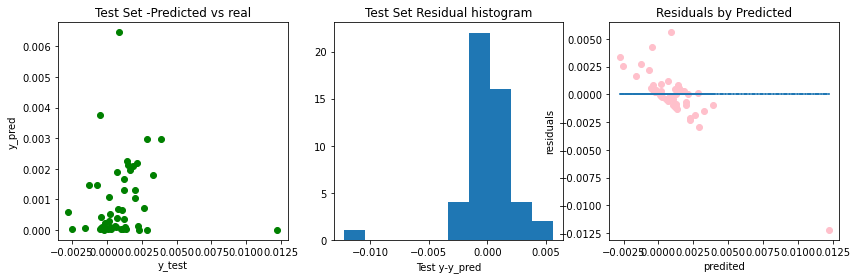

In [30]:
# Make an scatter plot y_pred vs y
# What kind of plot you will get if all the all the predictions are ok?
# A stright line

fig, ax = plt.subplots(1,3,figsize=(14,4))
ax[0].plot(y_pred, y_test,'o',  color= 'green')
ax[0].set_xlabel("y_test")
ax[0].set_ylabel("y_pred")
ax[0].set_title("Test Set -Predicted vs real")

# Get a histogram of the residuals ie: y - y_pred.  Homoscdasticity
# It resembles a normal distribution?
ax[1].hist(y_test - y_pred)
ax[1].set_xlabel("Test y-y_pred")
ax[1].set_title("Test Set Residual histogram")

ax[2].plot(y_pred,y_test - y_pred,"o", color = 'pink')
ax[2].set_xlabel("predited")
ax[2].set_ylabel("residuals")
ax[2].set_title("Residuals by Predicted")
ax[2].plot(y_pred,np.zeros(len(y_pred)),linestyle='dashed')

1. Linearility, We have a 45 degrees, good alineation between the y_test and y_pred 
2. The errors follow a normal distribution. I look the y_test-y_predict, im showing the error with the histogram and we can see a normal distribution (my errors follow a normal distribution: normality of residuals), with mean 0, and maybe standard deviation
3. The variance follows a constant/linear behaviour. The errors of my predictions are, the variace, how the data is disperse; We can see the variance is constant=equivalente (orange line)

<b> more fancy using seaborn

<AxesSubplot:xlabel='y_pred', ylabel='y_test'>

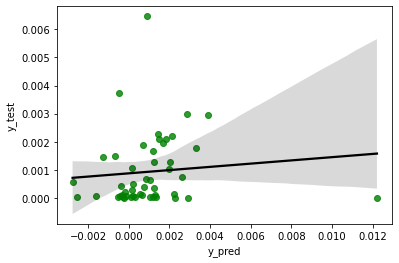

In [31]:
sns.regplot(x='y_pred',y='y_test', data=result, scatter_kws={"color": "green"}, line_kws={"color": "black"})

### Error metrics

#### MSE (Mean Square Error) & MAE(Mean Absolute Error)

In [32]:
print(mse(y_test,y_pred))
print(mae(y_test,y_pred))

5.5143010182788e-06
0.0013150768779672888


In [33]:
##prediction on the train set
mse(y_train,y_pred_train)

1.393087746357144e-07

#### R-Squared is also termed the standardized version of MSE

R-squared is always between 0 and 100%:

0% represents a model that does not explain any of the variation in the response variable around its mean. The mean of the dependent variable predicts the dependent variable as well as the regression model.
100% represents a model that explains all the variation in the response variable around its mean.
Usually, the larger the R2, the better the regression model fits your observations.

In [35]:
R2=r2_score(y_test,y_pred)
R2

-2.578140858041061

In [48]:
R2_test=model.score(X_test_scaled,y_test)
R2_train=model.score(X_train_scaled,y_train)
R2_test

0.4073849067848949

###  getting the number of parameters 

In [49]:
X_test.shape[1]

7

In [50]:
Adj_R2= 1 - (1-R2)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)
Adj_R2

0.40608815603387727

#### Feature Importance

In [51]:
features_importances = pd.DataFrame(data={
    'Attribute': X_train.columns,
    'Importance': abs(model.coef_)
})
features_importances = features_importances.sort_values(by='Importance', ascending=False)

In [52]:
features_importances

,Attribute,Importance
2,monthly_premium_auto,187.801909
1,income,33.181262
0,customer_lifetime_value,6.598630
6,number_of_policies,2.320157
3,months_since_last_claim,1.905981
5,number_of_open_complaints,1.717056
4,months_since_policy_inception,0.911486


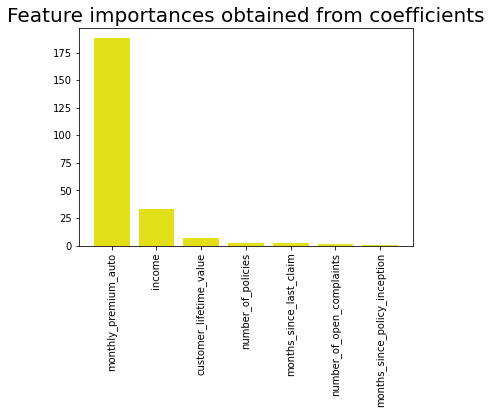

In [53]:
plt.bar(x=features_importances['Attribute'], height = features_importances['Importance'], color='#e3e019')
plt.title('Feature importances obtained from coefficients', size=20)
plt.xticks(rotation='vertical')
plt.show()

In [54]:
cat_val

,region_east,region_north west,region_west region,response_yes,coverage_extended,coverage_premium,education_college,education_doctor,education_high school or below,education_master,...,sales_channel_branch,sales_channel_call center,sales_channel_web,vehicle_class_luxury car,vehicle_class_luxury suv,vehicle_class_sports car,vehicle_class_suv,vehicle_class_two-door car,vehicle_size_medsize,vehicle_size_small
0,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,0,0,1,0,0,0,1,0,0,0,...,0,1,0,0,0,0,0,0,1,0
2,1,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,1,0,1,0
3,0,1,0,1,1,0,1,0,0,0,...,1,0,0,0,0,0,0,0,1,0
4,0,1,0,0,0,1,0,0,0,0,...,1,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10684,0,0,0,0,0,1,0,0,0,0,...,0,0,1,1,0,0,0,0,1,0
10685,0,1,0,0,0,0,1,0,0,0,...,1,0,0,0,0,0,0,0,1,0
10686,0,0,0,0,1,0,0,0,0,0,...,0,0,1,0,1,0,0,0,1,0
10687,0,0,1,0,0,1,1,0,0,0,...,1,0,0,0,0,0,1,0,1,0


In [55]:
df_num

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount
0,4809,48029,61,7,52,0,9,292
1,2228,92260,64,3,26,0,1,744
2,14947,22139,100,34,31,0,2,480
3,22332,49078,97,10,3,0,2,484
4,9025,23675,117,33,31,0,7,707
...,...,...,...,...,...,...,...,...
10684,15563,61541,253,12,40,0,7,1214
10685,5259,61146,65,7,68,0,6,273
10686,23893,39837,201,11,63,0,2,381
10687,11971,64195,158,0,27,4,6,618


# Activity 3- categorical  & numerical variables after test

##  Concatenating

In [56]:
df1 = df_num.drop(['total_claim_amount'], axis=1)
df2 = cat_val

frames =[df1, df2]
df_concat = pd.concat(frames,axis =1, join = 'inner')


In [57]:
df_concat

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,region_east,region_north west,region_west region,...,sales_channel_branch,sales_channel_call center,sales_channel_web,vehicle_class_luxury car,vehicle_class_luxury suv,vehicle_class_sports car,vehicle_class_suv,vehicle_class_two-door car,vehicle_size_medsize,vehicle_size_small
0,4809,48029,61,7,52,0,9,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,2228,92260,64,3,26,0,1,0,0,1,...,0,1,0,0,0,0,0,0,1,0
2,14947,22139,100,34,31,0,2,1,0,0,...,0,1,0,0,0,0,1,0,1,0
3,22332,49078,97,10,3,0,2,0,1,0,...,1,0,0,0,0,0,0,0,1,0
4,9025,23675,117,33,31,0,7,0,1,0,...,1,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10684,15563,61541,253,12,40,0,7,0,0,0,...,0,0,1,1,0,0,0,0,1,0
10685,5259,61146,65,7,68,0,6,0,1,0,...,1,0,0,0,0,0,0,0,1,0
10686,23893,39837,201,11,63,0,2,0,0,0,...,0,0,1,0,1,0,0,0,1,0
10687,11971,64195,158,0,27,4,6,0,0,1,...,1,0,0,0,0,0,1,0,1,0


## Normalization/standarization data with minmax

In [58]:
# copy the data
df_min_max_scaled = df_concat.copy()
  
# apply normalization techniques
for column in df_min_max_scaled.columns:
    df_min_max_scaled[column] = (df_min_max_scaled[column] - df_min_max_scaled[column].min()) / (df_min_max_scaled[column].max() - df_min_max_scaled[column].min())    

    #view normalized data
print(df_min_max_scaled)

       customer_lifetime_value    income  monthly_premium_auto  \
0                     0.035750  0.422396              0.000000   
1                     0.004053  0.914158              0.012658   
2                     0.160254  0.134550              0.164557   
3                     0.250949  0.434059              0.151899   
4                     0.087526  0.151628              0.236287   
...                        ...       ...                   ...   
10684                 0.167819  0.572623              0.810127   
10685                 0.041276  0.568231              0.016878   
10686                 0.270119  0.331317              0.590717   
10687                 0.123706  0.602130              0.409283   
10688                 0.060901  0.654907              0.168776   

       months_since_last_claim  months_since_policy_inception  \
0                     0.200000                       0.525253   
1                     0.085714                       0.262626   
2           

## Data splitting

In [59]:
X_c=df_min_max_scaled 
y_c=df_num.total_claim_amount


In [60]:
X_train_c, X_test_c, y_train, y_test = train_test_split(X_c, y_c, test_size=.30,random_state=123)
X_train_c, X_test_c, y_train, y_test

(       customer_lifetime_value    income  monthly_premium_auto  \
 6608                  0.065985  0.116828              0.037975   
 5697                  0.039066  0.671940              0.029536   
 10524                 0.031071  0.539669              0.206751   
 397                   0.250949  0.434059              0.151899   
 6324                  0.006533  0.179501              0.037975   
 ...                        ...       ...                   ...   
 9785                  0.014590  0.710453              0.063291   
 7763                  0.046176  0.764887              0.046414   
 5218                  0.006583  0.144490              0.004219   
 1346                  0.266447  0.737359              0.021097   
 3582                  0.176084  0.655052              0.054852   
 
        months_since_last_claim  months_since_policy_inception  \
 6608                  0.657143                       0.868687   
 5697                  0.171429                       0.959596

## Linear Regression(all data)

In [61]:
model=LinearRegression()    # model
model.fit(X_train_c, y_train)   # model train

LinearRegression()

### Model parameters  ( b1,b2,b3,b4) and the intercept value b

In [62]:
print('The coefficients/parameters of the model are: ')
model.coef_

The coefficients/parameters of the model are: 


array([ 1.15988790e+00, -2.00374062e+01,  1.22452237e+03,  1.74648813e+01,
        1.82396553e+00,  9.10912386e+00, -3.00873606e+00,  8.28738836e+00,
        6.89664811e-01,  4.85564833e+00, -2.73738537e+01, -1.18042147e+01,
       -1.25733725e+01, -8.08732670e+00, -2.04371802e+01,  4.97416210e+00,
       -1.27909039e+01, -7.95914486e+00, -1.17803963e+01, -3.35490135e+00,
        2.50051516e+01, -9.27503780e+00, -3.33188610e+00, -1.31162027e+01,
       -9.09770092e+00, -1.16785606e+01, -1.46754820e+01,  7.63674946e+00,
        9.07419981e+00, -1.19836785e+01,  2.61709808e+00, -1.87730147e+01,
       -3.14258616e+01, -4.77017101e+00,  1.31820799e+01,  3.57940574e+00,
       -3.71011328e+00,  2.06161921e+01,  8.57495029e+00, -1.32778529e+01,
       -2.64835983e+01, -6.61473380e+00,  2.23228951e+00, -1.15751818e+00,
       -1.94556996e+01, -9.14597515e+00, -2.67907064e+01,  1.60199770e+14,
        1.60199770e+14,  1.60199770e+14,  1.60199770e+14,  1.60199770e+14,
        1.60199770e+14,  

In [63]:
print('The intercept value(b) of the model is: ')
model.intercept_

The intercept value(b) of the model is: 


-160199769854652.34

### Making prediction

In [64]:
y_pred=model.predict(X_test_c)   # model prediction

y_pred_train=model.predict(X_train_c)

In [65]:
y_pred

array([436.5    , 394.78125, 141.3125 , ..., 587.21875, -32.3125 ,
       480.90625])

### Features importances

In [66]:
features_importances = pd.DataFrame(data={
    'Attribute': X_train_c.columns,
    'Importance': abs(model.coef_)
})
features_importances = features_importances.sort_values(by='Importance', ascending=False)

In [75]:
features_importances

,Attribute,Importance
92,policy_special l1,1.655364e+15
94,policy_special l3,1.655364e+15
86,policy_type_special auto,1.655364e+15
93,policy_special l2,1.655364e+15
89,policy_personal l1,3.519364e+14
...,...,...
8,region_north west,6.896648e-01
107,vehicle_size_small,6.600444e-01
88,policy_corporate l3,4.433145e-01
78,employment_status_retired,3.363812e-01


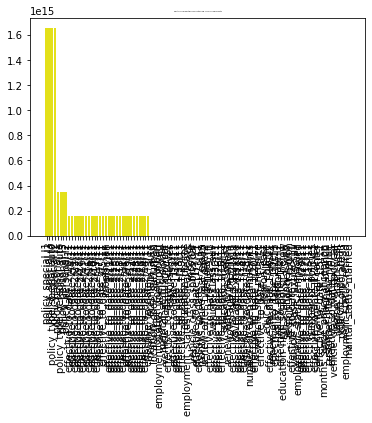

In [82]:
plt.bar(x=features_importances['Attribute'], height = features_importances['Importance'], color='#e3e019')
plt.title('Feature importances obtained from coefficients', size=2)
plt.xticks(rotation='vertical')
plt.show()

### Predicting on new data

In [67]:
## new record 
new_data= np.random.uniform(0, 100, 108)
#new_data=[2000,2500,100,25,12,1,1]
new_data_scaled=np.array(new_data).reshape(-1,108)

In [68]:
np.array(np.array(new_data).reshape(-1,108)).shape

(1, 108)

In [69]:
print('The total claim amount for the person who has a customer_life_time_value =2000, an income = 2500, a monthly premium auto = 100, months since last claim = 25 and months since policy inception = 12')
model.predict(new_data_scaled)

The total claim amount for the person who has a customer_life_time_value =2000, an income = 2500, a monthly premium auto = 100, months since last claim = 25 and months since policy inception = 12


C:\Users\Barbara\anaconda3\envs\BV_Env\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([4.38986187e+17])

In [70]:
result=pd.DataFrame({"y_test":y_test,"y_pred":y_pred})

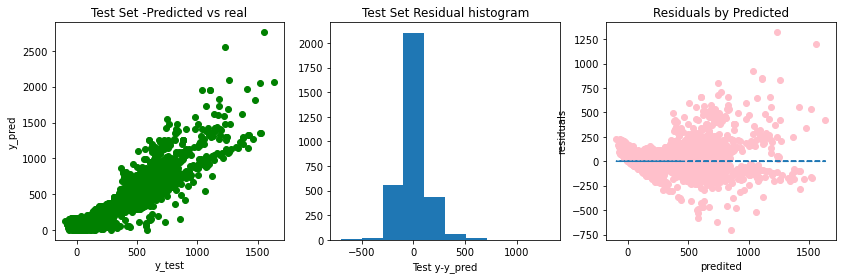

In [71]:
# Make an scatter plot y_pred vs y
# What kind of plot you will get if all the all the predictions are ok?
# A stright line

fig, ax = plt.subplots(1,3,figsize=(14,4))
ax[0].plot(y_pred, y_test,'o',  color= 'green')
ax[0].set_xlabel("y_test")
ax[0].set_ylabel("y_pred")
ax[0].set_title("Test Set -Predicted vs real")

# Get a histogram of the residuals ie: y - y_pred.  Homoscdasticity
# It resembles a normal distribution?
ax[1].hist(y_test - y_pred)
ax[1].set_xlabel("Test y-y_pred")
ax[1].set_title("Test Set Residual histogram")

ax[2].plot(y_pred,y_test - y_pred,"o", color = 'pink')
ax[2].set_xlabel("predited")
ax[2].set_ylabel("residuals")
ax[2].set_title("Residuals by Predicted")
ax[2].plot(y_pred,np.zeros(len(y_pred)),linestyle='dashed')

In [72]:
print(mse(y_test,y_pred))
print(mae(y_test,y_pred))

19166.907823705955
95.59816417212348


In [73]:
R2=r2_score(y_test,y_pred)
R2

0.7702223555403322

In [74]:
Adj_R2= 1 - (1-R2)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)
Adj_R2

0.769719559819414

In [86]:
(80.94-85)/(11.6/np.sqrt(50))


-2.4748737341529177